**Autor:** Jesús

**Fecha:** 14/03/2022

# Polarimetría de Stokes

Voy a revisar un poquito de lo que sabemos de polarimetría de Stokes. 

## Experimento

El esquema de un experimento de polarimetría de Stokes es el siguiente: 

Haz que se va a medir  -> Analizador de estados (PSA)   ->   Detector de intensidad

El haz que se va a medir se representa por un vector de Stokes $S$ (o de Jones si es totalmente polarizado). El PSA se reprsenta por una matriz de Mueller $M^{PSA}$ (de Jones si no despolariza y la luz que le llega es totalmente polarizada). Alternativamente, también se utiliza un vector de Stokes para denotar al PSA ($^{PSA}$), que corresponde con el autoestado de transmisión del PSA. Esto supone asumir que los elementos del PSA son ideales (de momento voy a asumirlo yo también).

## Medida del vector de Stokes

Para medir un estado de luz (vector de Stokes) hacen falta al menos 4 medidas de intensidad linealmente independientes. Vamos a considerar una medida. El vector de Stokes que llega al detector es:

$S^i = M^{PSA, i} * S$

Ahora bien, el detector unicamente mide intensidad, i.e., $S_0$. Eso significa que únicamente nos importa la 1ª fila de $M^{PSA}$. 

$P^i = \sum_{j=0}^{3}M^{PSA, i}_0,j * S_j $

Si ahora tenemos en cuenta N medidas de intensidad, obtenemos un sistema lineal:

$P = W * S$

donde P es un vector de N elementos y W es una matriz de N x 4 elementos donde cada fila corresponde a la primera fila de $M^{PSA}$ en una configuración diferente. De ahí, calcular $S$ es muy facil:

$S = W^{-1} * P$

Siendo $W^{-1}$ la matriz inversa de $W$ si $N=4$ o su matriz pseudoinversa $W^{-1} = (W^T * W)^{-1} * W^T$ si N > 4. Ahora bien, para poder calcular la inversa (o pseudoinversa) la matriz $W$ debe tener rango 4, es decir, tener al menos 4 filas linealmente independientes. ¿Cómo saberlo? Facil, distribuyendo los $S^{PSA, i}$ en la esfera de Poincare, deben generar una figura con volumen > 0, es deciir, no deben estar todos en el mismo plano. De hecho, cuanto mayor es el volumen de esa figura, menores son sus errores (en el caso mínimo, N=4 medidas, esto corresponde con los vertices de un tetraedro). Ref: "Optimization of retardance for a complete Stokes polarimeter", Sabatke et al., OPTICS LETTERS / Vol.  25, No.  11 / June 1, 2000). 

## Nuestro problema

Vamos a ver las matrices de nuestro problema.

In [2]:
from py_pol.mueller import Mueller, Stokes, np, degrees
from py_lab.utils import PSA_angles_2_states

number of processors: 8


In [3]:
def PSA_M(aR, aP):
    """Genera la matriz del PSA a partir de los angulos de los elementos de polarización usando elementos ideales."""
    Mr = Mueller().quarter_waveplate(azimuth=aR)
    Mp = Mueller().diattenuator_perfect(azimuth=aP)
    return Mp * Mr

def PSA_S(aR, aP):
    """Genera el vector de Stokes del estado de transmision del PSA"""
    az, el = PSA_angles_2_states(aP, aR)
    S = Stokes().general_azimuth_ellipticity(azimuth=az, ellipticity=el)
    return S

In [4]:
# Filas
print(PSA_M(0 * degrees,0 * degrees).M[0,:,0])
print(PSA_M(45 * degrees,45 * degrees).M[0,:,0])
print(PSA_M(90 * degrees,90 * degrees).M[0,:,0])
print(PSA_M(135 * degrees,135 * degrees).M[0,:,0])
print(PSA_M(135 * degrees,0 * degrees).M[0,:,0])
print(PSA_M(45 * degrees,0 * degrees).M[0,:,0])


[0.5 0.5 0.  0. ]
[5.000000e-01 3.061617e-17 5.000000e-01 0.000000e+00]
[ 5.000000e-01 -5.000000e-01  6.123234e-17  0.000000e+00]
[ 5.00000000e-01 -9.18485099e-17 -5.00000000e-01  0.00000000e+00]
[5.00000000e-01 1.68722976e-32 9.18485099e-17 5.00000000e-01]
[ 5.00000000e-01  1.87469973e-33  3.06161700e-17 -5.00000000e-01]


S = 
[+1.000]   [+1.000]   [+1.000]   [+1.000]   [+1.000]   [+1.000]   
[+1.000]   [+0.000]   [-1.000]   [-0.000]   [-0.000]   [+0.000]   
[+0.000]   [+1.000]   [+0.000]   [-1.000]   [-0.000]   [+0.000]   
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+1.000]   [-1.000]   



d:\codigo_ucm\py_pol\py_pol\drawings.py:182: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


([<Axes3DSubplot:title={'center':'S'}, xlabel='$S_1$', ylabel='$S_2$'>],
 <Figure size 432x432 with 1 Axes>)

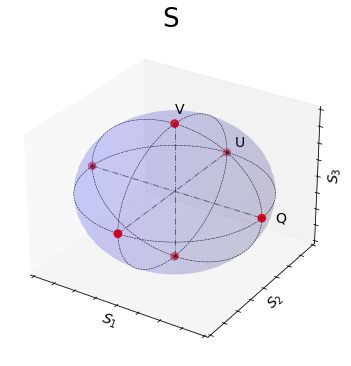

In [5]:
# Stokes
aR = np.array([0, 45, 90, 135, -45, +45]) * degrees
aP = np.array([0, 45, 90, 135, 0, 0]) * degrees
S = PSA_S(aR, aP)
print(S)
S.draw_poincare()

Los puntos están en un octaedro en la esfera de Poincaré. Yo diría que, con 6 medidas, eso nos da el volumen máximoque puede tener la figura. Por lo tanto, podemos construir nuestro detector con las 6 zonas que hemos hablado, y sustituir los polarizadoes circulares por retardador a $\pm$45º más un polarizador a 0º. Eso si son las laminas estas que has encontrado, Javier (aunque habría que saber si con + o con -). 

Eso si, estoy suponiendo que los elementos de matriz son ideales. Que luego no lo sean es otro asunto....

## Cálculo del vector de Stokes

Por último, voy a calcular la matriz $W^{-1}$ que hace falta para medir el vector de Stokes con estos elementos ideales.

In [8]:
# Calcular matriz W
W = np.zeros((6,4))
aR = np.array([0, 90, 45, 135, -45, 45]) * degrees
aP = np.array([0, 90, 45, 135, 0, 0]) * degrees
for ind in range(6):
    M = PSA_M(aR[ind], aP[ind])
    W[ind,:] = M.M[0,:,0]
    
# Calcular matriz pseudo-inversa
Wt = W.T
Wi = np.linalg.inv(Wt @ W) @ Wt

# print
for fila in Wi:
    print("[", end="")
    for ind, v in enumerate(fila):
        print("{:+.3f}  ".format(v), end="")
    print("]")

[+0.333  +0.333  +0.333  +0.333  +0.333  +0.333  ]
[+1.000  -1.000  +0.000  -0.000  +0.000  +0.000  ]
[-0.000  +0.000  +1.000  -1.000  -0.000  -0.000  ]
[-0.000  +0.000  +0.000  -0.000  +1.000  -1.000  ]


El resultado es bastante sorprendente. Aunque retardador lineal + Polarizador lineal a 45 NO es un polarizador circular (ya que la polarización de salida es lineal) si que sirve para calcular el vector de Stokes como si fuese un polarizador circular ($S_1 = P_0 - P_{090}$, ...